# imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import holidays
import seaborn as sns
import numpy as np
import mplcursors
import plotly.express as px
import numpy as np

# Data upload

In [5]:
df=pd.read_csv('../../raw_data/df_raw_data.csv')
channels_spend = ["tt_costs", "fb_costs", "google_costs"]
df["Total_Spend"] = df[channels_spend].sum(axis=1)
df.drop(columns=['Unnamed: 0'], inplace=True, axis=1)

In [6]:
df['ROI']= df['total_sales']/df["Total_Spend"]

In [7]:
df['fb_cpc']=df['fb_costs']/df['fb_clicks']
df['tt_cpc']=df['tt_costs']/df['tt_clicks']
df['google_cpc']=df['google_costs']/df['google_clicks']

In [8]:
df['fb_cpm']=(df['fb_costs']/df['fb_impressions'])*1000
df['tt_cpm']=(df['tt_costs']/df['tt_impressions'])*1000
df['google_cpm']=(df['google_costs']/df['google_impressions'])*1000

In [9]:
df.head()

,Day,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,tt_impressions,tt_clicks,Total_Spend,ROI,fb_cpc,tt_cpc,google_cpc,fb_cpm,tt_cpm,google_cpm
0,2021-07-01,10,414.85,257.01,36200.0,129.0,1.17,39.0,20.0,NaN,NaN,NaN,258.18,1.606825,1.992326,NaN,0.05850,7.099724,NaN,30.000000
1,2021-07-02,6,229.95,250.30,33040.0,150.0,0.84,14.0,7.0,NaN,NaN,NaN,251.14,0.915625,1.668667,NaN,0.12000,7.575666,NaN,60.000000
2,2021-07-03,10,459.89,248.59,33031.0,129.0,0.72,12.0,6.0,NaN,NaN,NaN,249.31,1.844651,1.927054,NaN,0.12000,7.525960,NaN,60.000000
3,2021-07-04,17,508.36,258.05,37463.0,119.0,0.07,13.0,5.0,NaN,NaN,NaN,258.12,1.969472,2.168487,NaN,0.01400,6.888130,NaN,5.384615
4,2021-07-05,13,399.88,257.47,35963.0,142.0,0.38,34.0,16.0,NaN,NaN,NaN,257.85,1.550824,1.813169,NaN,0.02375,7.159303,NaN,11.176471


In [10]:
# Convert 'Day' column to datetime type
df['Day'] = pd.to_datetime(df['Day'])

# Set 'Day' column as index
df.set_index('Day', inplace=True)

# Check if the index is a DatetimeIndex
print(df.index)

# Resample data by month and aggregate using sum (you can use other aggregation functions)
df_monthly = df.resample('M').sum()
df_monthly

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
               '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08',
               '2021-07-09', '2021-07-10',
               ...
               '2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18',
               '2023-08-19', '2023-08-20', '2023-08-21', '2023-08-22',
               '2023-08-23', '2023-08-24'],
              dtype='datetime64[ns]', name='Day', length=785, freq=None)


,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,tt_impressions,tt_clicks,Total_Spend,ROI,fb_cpc,tt_cpc,google_cpc,fb_cpm,tt_cpm,google_cpm
Day,,,,,,,,,,,,,,,,,,,
2021-07-31,696,28621.07,18239.87,3229060.0,13159.0,57.15,1329.0,522.0,0.00,0.0,0.0,18297.02,51.182511,48.333168,0.000000,3.017900,188.151881,0.000000,1.238680e+03
2021-08-31,869,33834.46,34009.52,5334003.0,22288.0,71.10,1533.0,654.0,0.00,0.0,0.0,34080.62,63.876974,44.623419,0.000000,3.353014,187.044396,0.000000,1.447707e+03
2021-09-30,339,12793.67,10420.81,1011118.0,4685.0,67.67,728.0,436.0,0.00,0.0,0.0,10488.48,30.550885,34.087717,0.000000,4.226361,164.283266,0.000000,2.588712e+03
2021-10-31,1072,29762.41,32494.04,4983518.0,17959.0,47.14,1269.0,650.0,0.00,0.0,0.0,32541.18,28.924454,60.167220,0.000000,2.232655,207.999773,0.000000,1.122004e+03
2021-11-30,561,17073.13,14127.43,2075497.0,6794.0,34.29,1088.0,573.0,0.00,0.0,0.0,14161.72,136.231276,NaN,0.000000,1.959583,294.488718,0.000000,1.064439e+03
2021-12-31,104,1822.59,290.60,69150.0,40.0,9.99,346.0,122.0,0.00,0.0,0.0,300.59,393.141234,NaN,0.000000,2.786262,74.934780,0.000000,1.104765e+03
2022-01-31,1184,37700.35,22286.03,4330075.0,20687.0,137.55,3267.0,1185.0,4993.51,4097730.0,19410.0,27417.09,72.668503,NaN,4.788554,2.879809,152.585088,22.210892,1.085592e+03
2022-02-28,1322,44525.78,19673.59,3578402.0,14132.0,258.75,6085.0,2052.0,13403.42,6608615.0,30922.0,33335.76,36.342065,39.619248,12.750130,3.499011,155.217960,59.130150,1.221443e+03
2022-03-31,1280,43400.96,15038.04,3020741.0,9038.0,847.66,4925.0,2647.0,10763.74,5177281.0,25759.0,26649.44,50.443506,51.577163,13.776596,8.753898,156.036657,65.826463,7.708340e+04


# Project intro

Welcome to our website, where we delve into the realm of marketing data analysis. Our project aims to empower you to predict sales trends based on factors such as seasonality and marketing budget allocation across popular platforms like Google, Facebook, and TikTok.

Within this platform, you'll discover an insightful exploration of data trends in marketing.Beyond that, our predictive model enables you to estimate total sales for this specific product, offering valuable insights for optimizing marketing strategies. We've designed this interface with user-friendliness in mind, making it accessible for anyone looking to gain a deeper understanding of marketing dynamics and make data-driven decisionsr!

# #  plots for Facebook 


[<matplotlib.lines.Line2D object at 0x1383bbd00>, <matplotlib.lines.Line2D object at 0x138474820>, <matplotlib.lines.Line2D object at 0x138474490>]
['Costs', 'Clicks', 'Impressions']


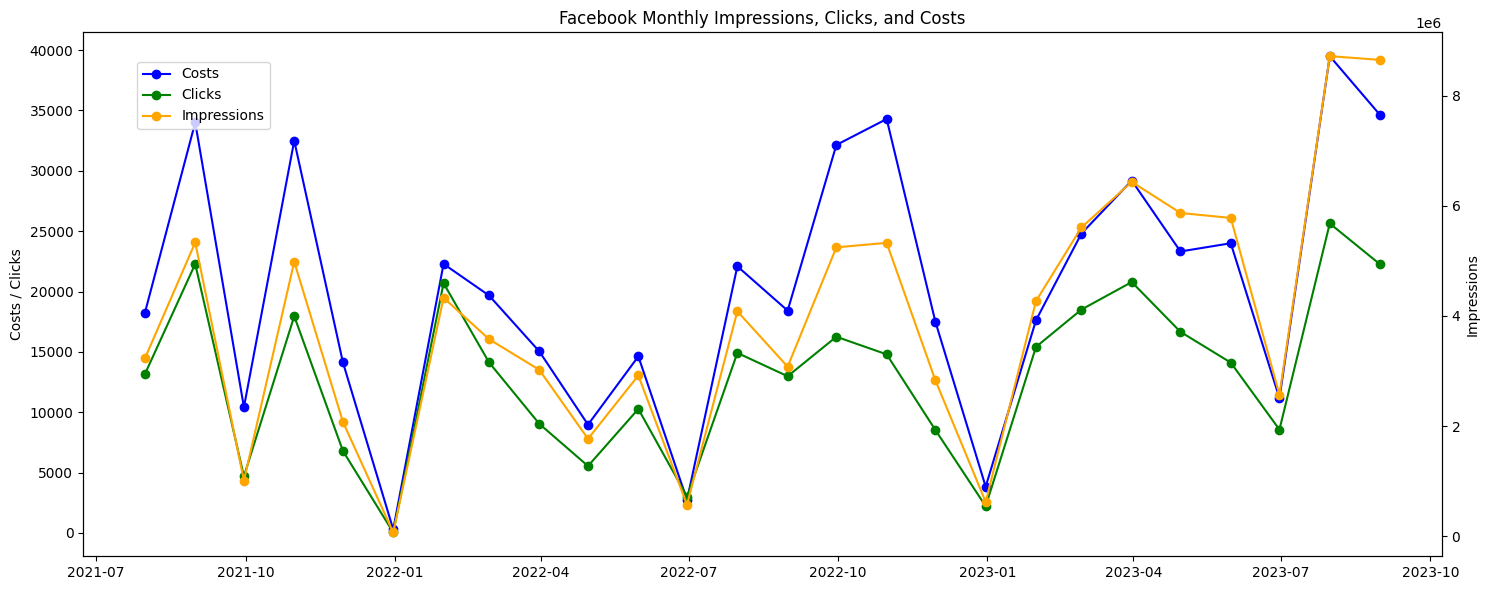

In [11]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.subplot(1, 1, 1)

# Plot the 'costs' and 'clicks' columns on the primary y-axis
plt.plot(df_monthly.index, df_monthly['fb_costs'], marker='o', color='blue', label='Costs')

plt.plot(df_monthly.index, df_monthly['fb_clicks'], marker='o', color='green', label='Clicks')
handles, labels = ax.get_legend_handles_labels()

# Set the left y-axis label
plt.ylabel('Costs / Clicks')


# Create a twin y-axis for the impressions data
ax2 = plt.gca().twinx()
ax2.plot(df_monthly.index, df_monthly['fb_impressions'], marker='o', color='orange', label='Impressions')
ax2.set_ylabel('Impressions')
handles= handles+ax2.get_legend_handles_labels()[0]
labels= labels+ax2.get_legend_handles_labels()[1]
print(handles)
print(labels)
# Set plot title and labels
plt.title('Facebook Monthly Impressions, Clicks, and Costs')
plt.xlabel('Date')

# Create separate legends for each y-axis
#legend1 = plt.gca().legend(loc='upper left')
#legend2 = ax2.legend(loc='upper right')

fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.09,0.9))

# Add the legends to the plot
#plt.gca().add_artist(legend1)
#plt.gca().add_artist(legend2)



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- Visualizes Facebook platform metrics: Clicks, impressions, and costs.
- Highlights trends: Marketing spend dips before January and July, along with clicks and impressions.
- Shows spikes: Increased spending and engagement after the new year and in the summer.
- Provides a clear snapshot of campaign performance over time.

In [12]:
df.columns

Index(['orders', 'total_sales', 'fb_costs', 'fb_impressions', 'fb_clicks',
       'google_costs', 'google_impressions', 'google_clicks', 'tt_costs',
       'tt_impressions', 'tt_clicks', 'Total_Spend', 'ROI', 'fb_cpc', 'tt_cpc',
       'google_cpc', 'fb_cpm', 'tt_cpm', 'google_cpm'],
      dtype='object')

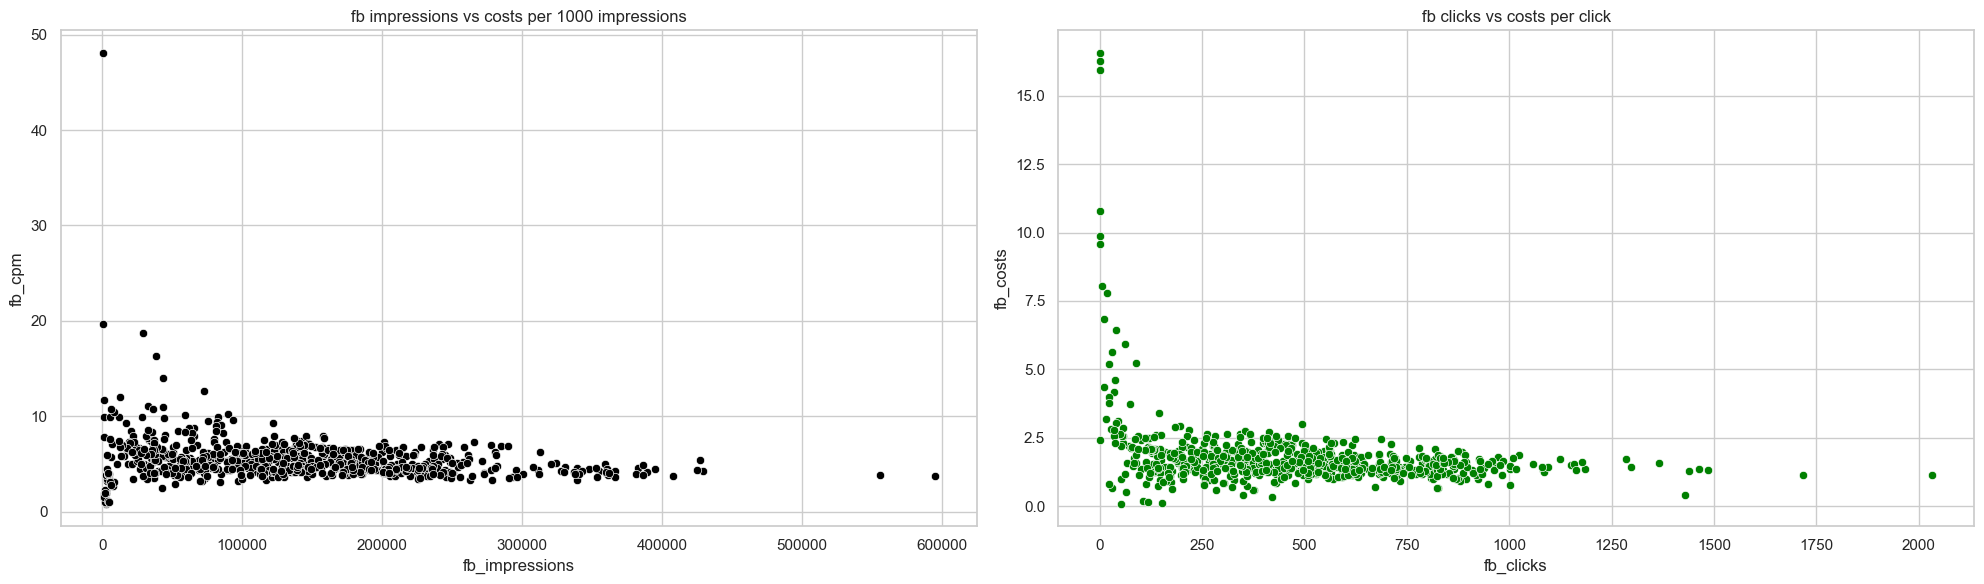

In [25]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x="fb_impressions", y="fb_cpm", c='black')
plt.xlabel('fb_impressions')
plt.ylabel('fb_cpm')
plt.title('fb impressions vs costs per 1000 impressions')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x="fb_clicks", y="fb_cpc", c='green')
plt.xlabel('fb_clicks')
plt.ylabel('fb_costs')
plt.title('fb clicks vs costs per click')

plt.tight_layout()
plt.show()

- The Facebook impressions and clicks plot reflects the effectiveness of our marketing efforts on the platform.

- The cost per 1000 impressions and clicks serves as an indicator of user interest in our marketing content.

- Notably, fewer clicks on our advertisements lead to higher costs per click and impressions on Facebook, underlining the importance of user engagement.

- Conversely, increased clicks and impressions result in more cost-effective advertising. It's important to consider that other factors also impact pricing, but this data highlights the need for potential ad improvements or changes.

- **Keep in mind that, in addition to user engagement, various other factors can influence the cost per click and cost per impression

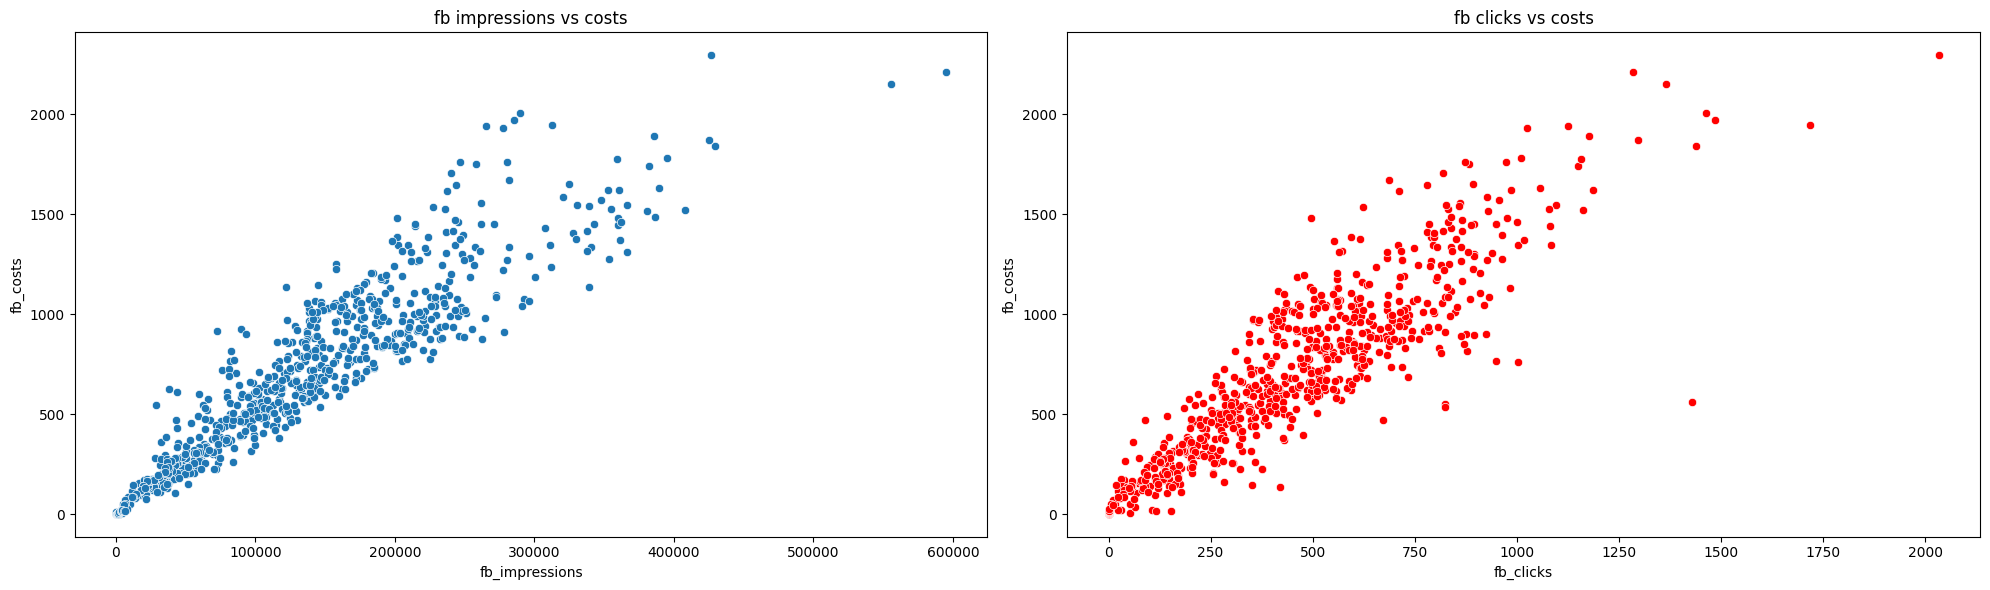

In [13]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x="fb_impressions", y="fb_costs")
plt.xlabel('fb_impressions')
plt.ylabel('fb_costs')
plt.title('fb impressions vs costs')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x="fb_clicks", y="fb_costs", color='red')
plt.xlabel('fb_clicks')
plt.ylabel('fb_costs')
plt.title('fb clicks vs costs')

plt.tight_layout()
plt.show()

- The plots reveal a strong correlation between marketing costs on the Facebook platform and the volume of clicks and impressions received by the advertised products.

- There is compelling evidence that increased spending is directly linked to higher impressions and clicks for the products.

- This data underscores the significance of the marketing budget in influencing user engagement and product visibility on the Facebook platform.

#  plots for Tiktok


[<matplotlib.lines.Line2D object at 0x138613f40>, <matplotlib.lines.Line2D object at 0x1386f9750>, <matplotlib.lines.Line2D object at 0x1386f8100>]
['Costs', 'Clicks', 'Impressions']


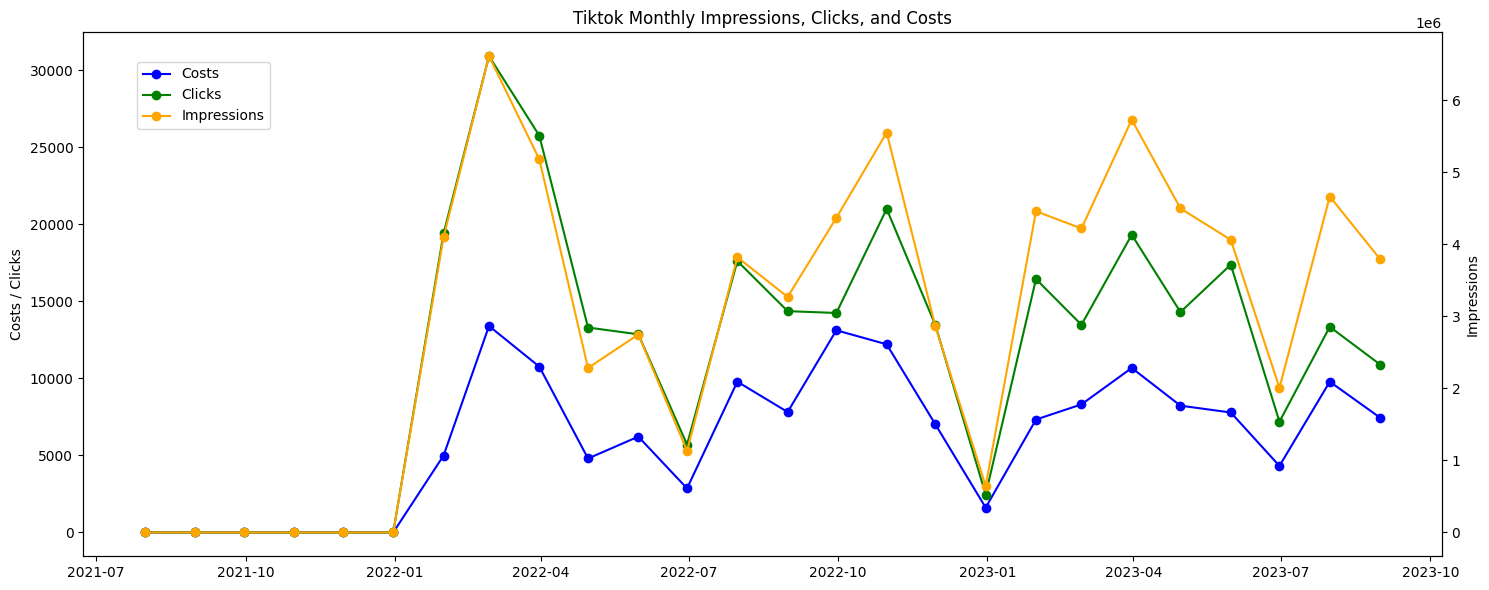

In [14]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.subplot(1, 1, 1)

# Plot the 'costs' and 'clicks' columns on the primary y-axis
plt.plot(df_monthly.index, df_monthly['tt_costs'], marker='o', color='blue', label='Costs')

plt.plot(df_monthly.index, df_monthly['tt_clicks'], marker='o', color='green', label='Clicks')
handles, labels = ax.get_legend_handles_labels()

# Set the left y-axis label
plt.ylabel('Costs / Clicks')


# Create a twin y-axis for the impressions data
ax2 = plt.gca().twinx()
ax2.plot(df_monthly.index, df_monthly['tt_impressions'], marker='o', color='orange', label='Impressions')
ax2.set_ylabel('Impressions')
handles= handles+ax2.get_legend_handles_labels()[0]
labels= labels+ax2.get_legend_handles_labels()[1]
print(handles)
print(labels)
# Set plot title and labels
plt.title('Tiktok Monthly Impressions, Clicks, and Costs')
plt.xlabel('Date')

# Create separate legends for each y-axis
#legend1 = plt.gca().legend(loc='upper left')
#legend2 = ax2.legend(loc='upper right')

fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.09,0.9))

# Add the legends to the plot
#plt.gca().add_artist(legend1)
#plt.gca().add_artist(legend2)



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- Visualizes Tiktok platform metrics: Clicks, impressions, and costs.

- TikTok demonstrates excellent value for money, with costs significantly lower than the quantity of clicks and impressions it delivers for the product.

- A discernible seasonal pattern is observed, with reduced activity in the months leading up to January and July.

- Conversely, following these periods, a pronounced uptick is evident, showcasing heightened user engagement and indicating a strong correlation with seasonal trends.

- Provides a clear snapshot of campaign performance over time.

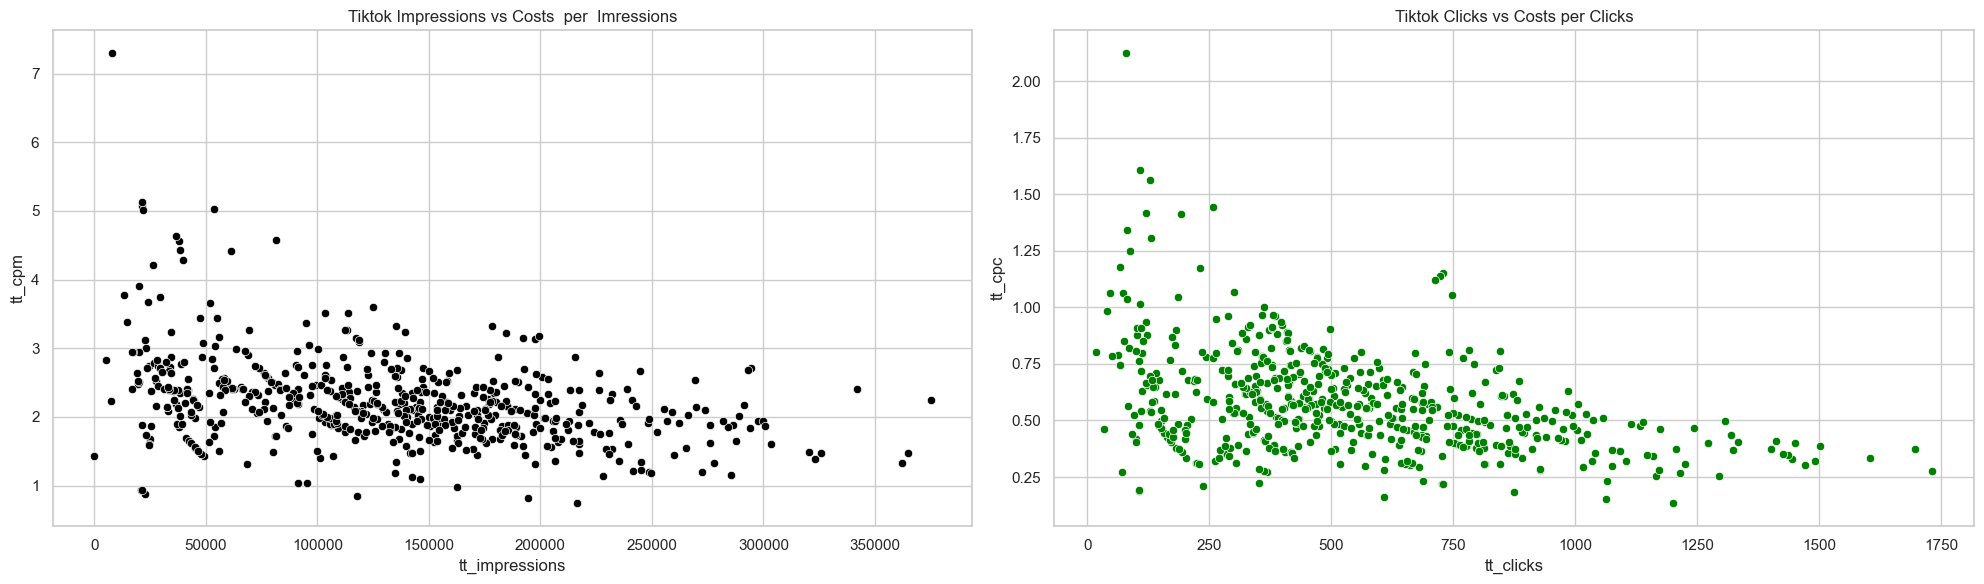

In [35]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x="tt_impressions", y="tt_cpm", c='black')
plt.xlabel('tt_impressions')
plt.ylabel('tt_cpm')
plt.title('Tiktok Impressions vs Costs  per  Imressions')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x="tt_clicks", y="tt_cpc", color='green')
plt.xlabel('tt_clicks')
plt.ylabel('tt_cpc')
plt.title('Tiktok Clicks vs Costs per Clicks')

plt.tight_layout()
plt.show()

- The TikTok impressions and clicks analysis provides insights into the effectiveness of our marketing campaigns on this platform.

- Cost per 1000 impressions and clicks on TikTok serves as a key metric reflecting user engagement and interest in our marketing content.

- Remarkably, TikTok exhibits significantly lower costs per 1000 impressions and clicks compared to any other platform, suggesting substantially higher user engagement with our product on TikTok.

- Moreover, it appears that TikTok, as a platform, seems to offer cost-effective advertising. Even in scenarios with lower impressions and clicks, the pricing rates remain notably economical.

- Lower CPC and CPM rates on TikTok not only indicate cost-efficiency but also seem to coincide with higher user engagement, making TikTok an attractive choice for marketing strategy.

- **Keep in mind that, in addition to user engagement, various other factors can influence the cost per click and cost per impression

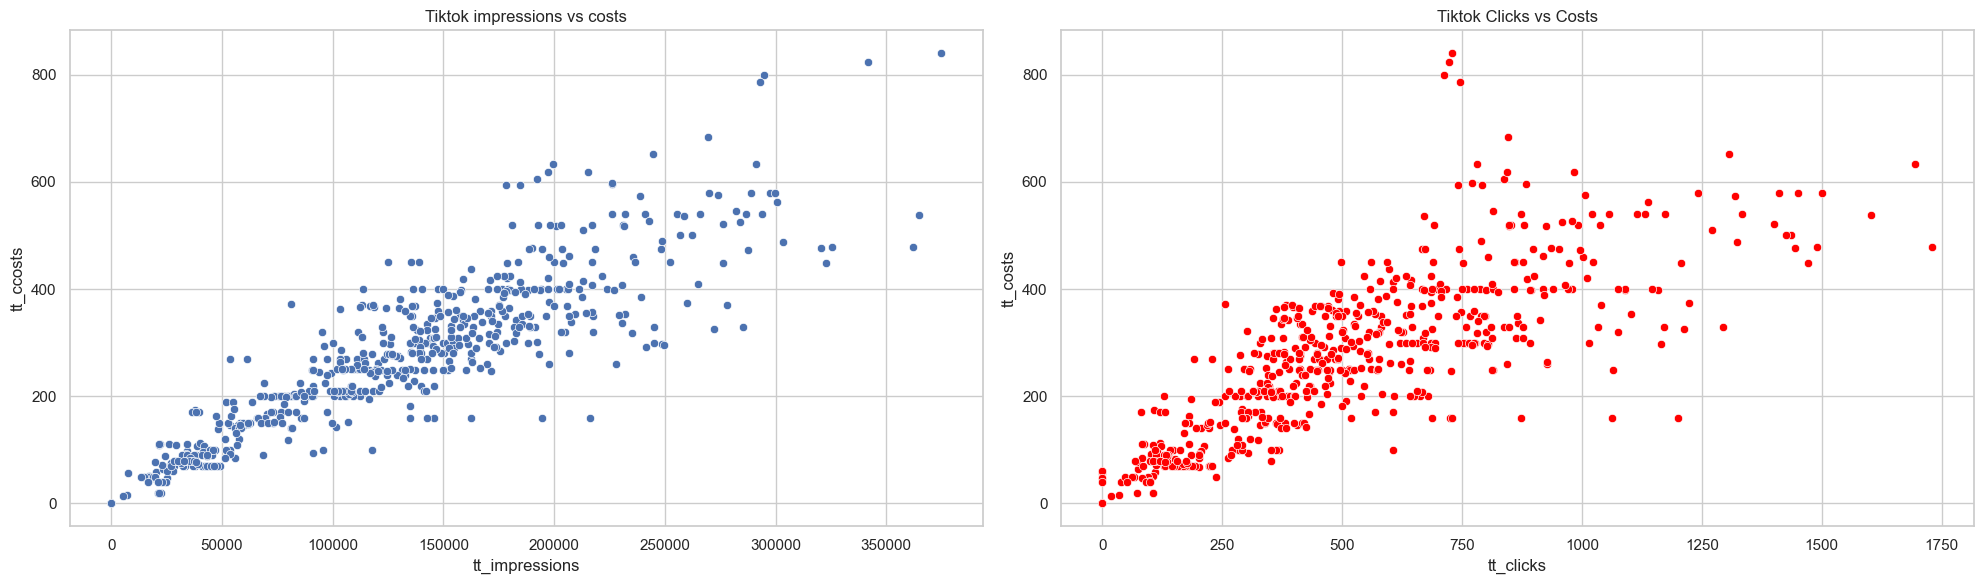

In [34]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x="tt_impressions", y="tt_costs")
plt.xlabel('tt_impressions')
plt.ylabel('tt_ccosts')
plt.title('Tiktok impressions vs costs')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x="tt_clicks", y="tt_costs", color='red')
plt.xlabel('tt_clicks')
plt.ylabel('tt_costs')
plt.title('Tiktok Clicks vs Costs')

plt.tight_layout()
plt.show()

- Evidently, TikTok demonstrates a robust relationship between marketing expenditures and the quantity of clicks and impressions garnered by the advertised products.

- The data provides compelling proof that heightened investment is closely associated with an uptick in impressions and clicks.

- This data underscores the pivotal role of the marketing budget in shaping user engagement and product visibility within the TikTok platform.

#  plots for Google

[<matplotlib.lines.Line2D object at 0x139b026e0>, <matplotlib.lines.Line2D object at 0x139d3b8b0>, <matplotlib.lines.Line2D object at 0x139d3b730>]
['Costs', 'Clicks', 'Impressions']


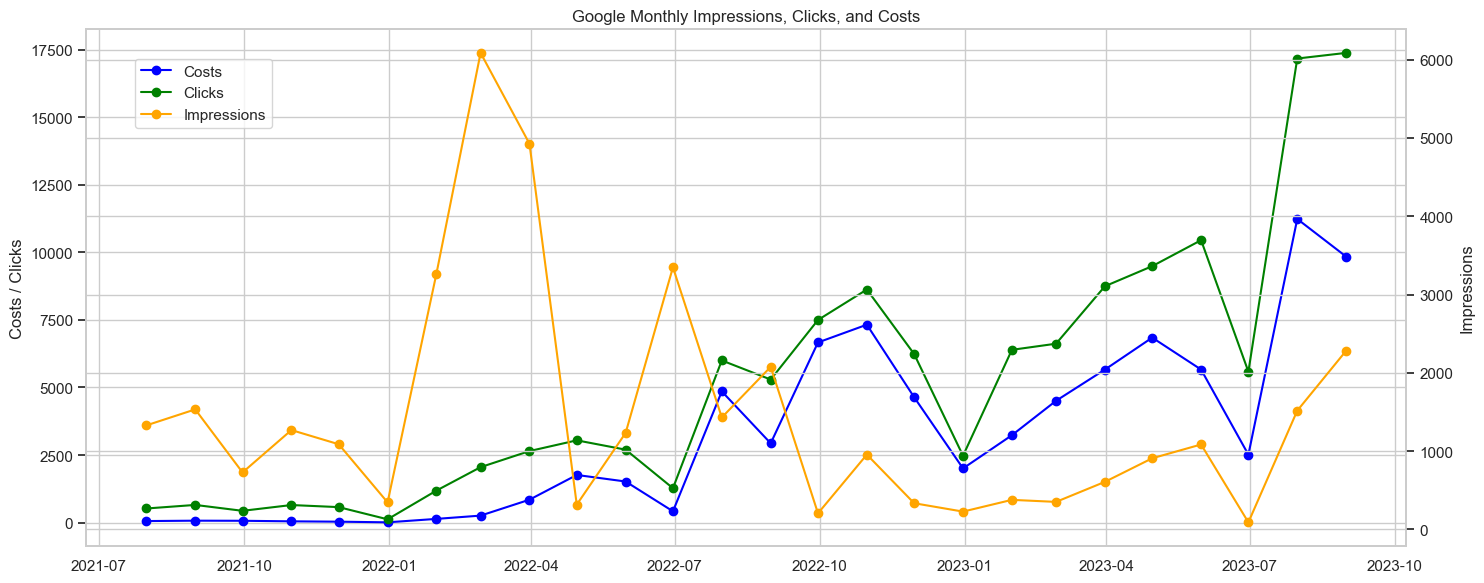

In [27]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.subplot(1, 1, 1)

# Plot the 'costs' and 'clicks' columns on the primary y-axis
plt.plot(df_monthly.index, df_monthly['google_costs'], marker='o', color='blue', label='Costs')

plt.plot(df_monthly.index, df_monthly['google_clicks'], marker='o', color='green', label='Clicks')
handles, labels = ax.get_legend_handles_labels()

# Set the left y-axis label
plt.ylabel('Costs / Clicks')


# Create a twin y-axis for the impressions data
ax2 = plt.gca().twinx()
ax2.plot(df_monthly.index, df_monthly['google_impressions'], marker='o', color='orange', label='Impressions')
ax2.set_ylabel('Impressions')
handles= handles+ax2.get_legend_handles_labels()[0]
labels= labels+ax2.get_legend_handles_labels()[1]
print(handles)
print(labels)
# Set plot title and labels
plt.title('Google Monthly Impressions, Clicks, and Costs')
plt.xlabel('Date')

# Create separate legends for each y-axis
#legend1 = plt.gca().legend(loc='upper left')
#legend2 = ax2.legend(loc='upper right')

fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.09,0.9))

# Add the legends to the plot
#plt.gca().add_artist(legend1)
#plt.gca().add_artist(legend2)



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- Visualizes Tiktok platform metrics: Clicks, impressions, and costs.

- Significant Google marketing expenditures became apparent starting from April 2022.

- An ambiguous spike in impressions occurred after January 2022, potentially indicating a seasonal trend or heightened user interest in the product.

- It appears that the Google platform excels in generating clicks, as the product receives the highest click rate when advertised on Google.

- Provides a clear snapshot of campaign performance over time.

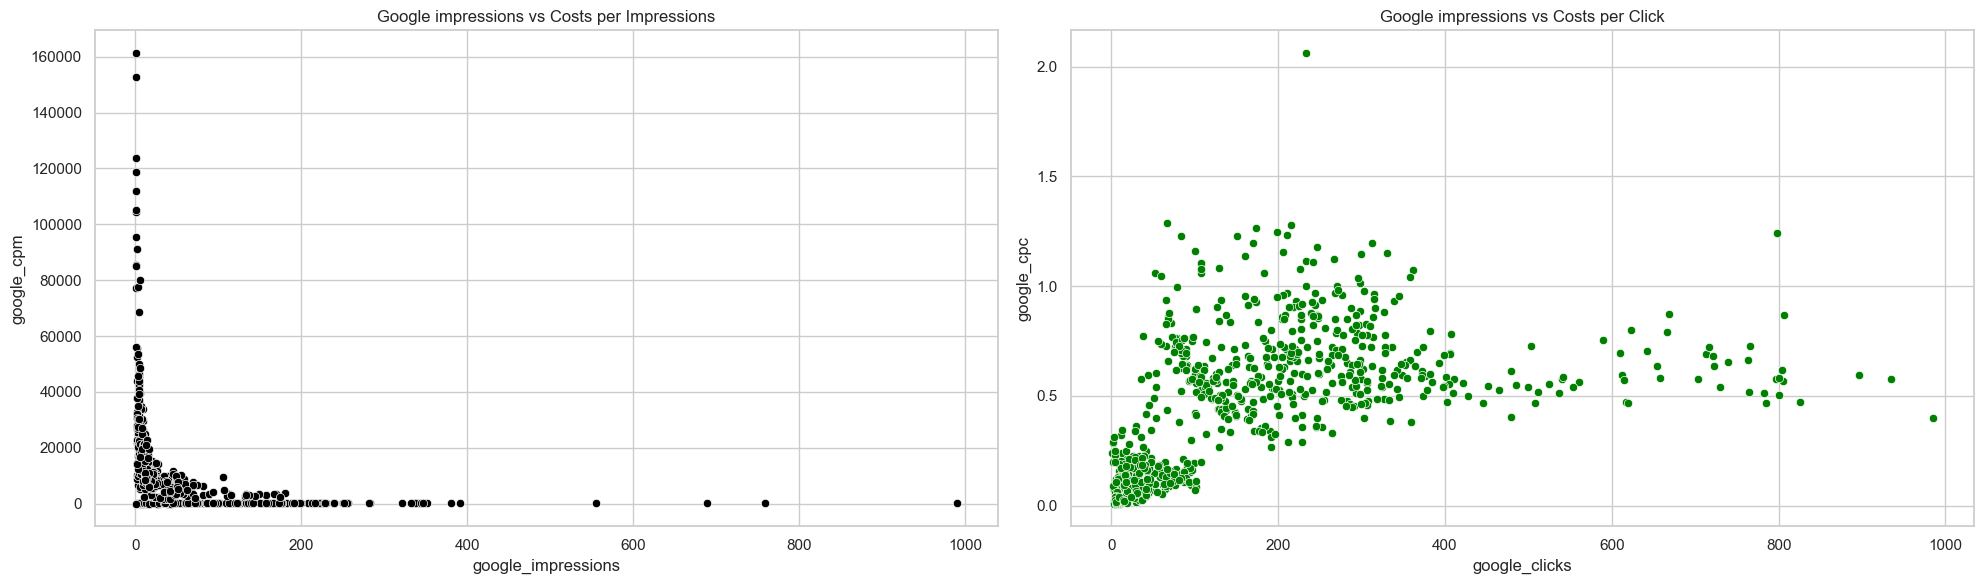

In [36]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x="google_impressions", y="google_cpm", c='black')
plt.xlabel('google_impressions')
plt.ylabel('google_cpm')
plt.title('Google impressions vs Costs per Impressions')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x="google_clicks", y="google_cpc", c='green')
plt.xlabel('google_clicks')
plt.ylabel('google_cpc')
plt.title('Google impressions vs Costs per Click')

plt.tight_layout()
plt.show()

- The TikTok impressions and clicks analysis provides insights into the effectiveness of our marketing campaigns on this platform.

- Cost per 1000 impressions and clicks on TikTok serves as a key metric reflecting user engagement and interest in our marketing content.

- Through these graphs, it's evident that the cost per 1000 impressions on the Google platform is underperforming. As user engagement decreases, the cost of impressions increases.

- Google's advertising strength lies in clicks, characterized by a favorable cost per click. Pricing generally remains low, and there's a clear indication of high user engagement through clicks.

- **Keep in mind that, in addition to user engagement, various other factors can influence the cost per click and cost per impression

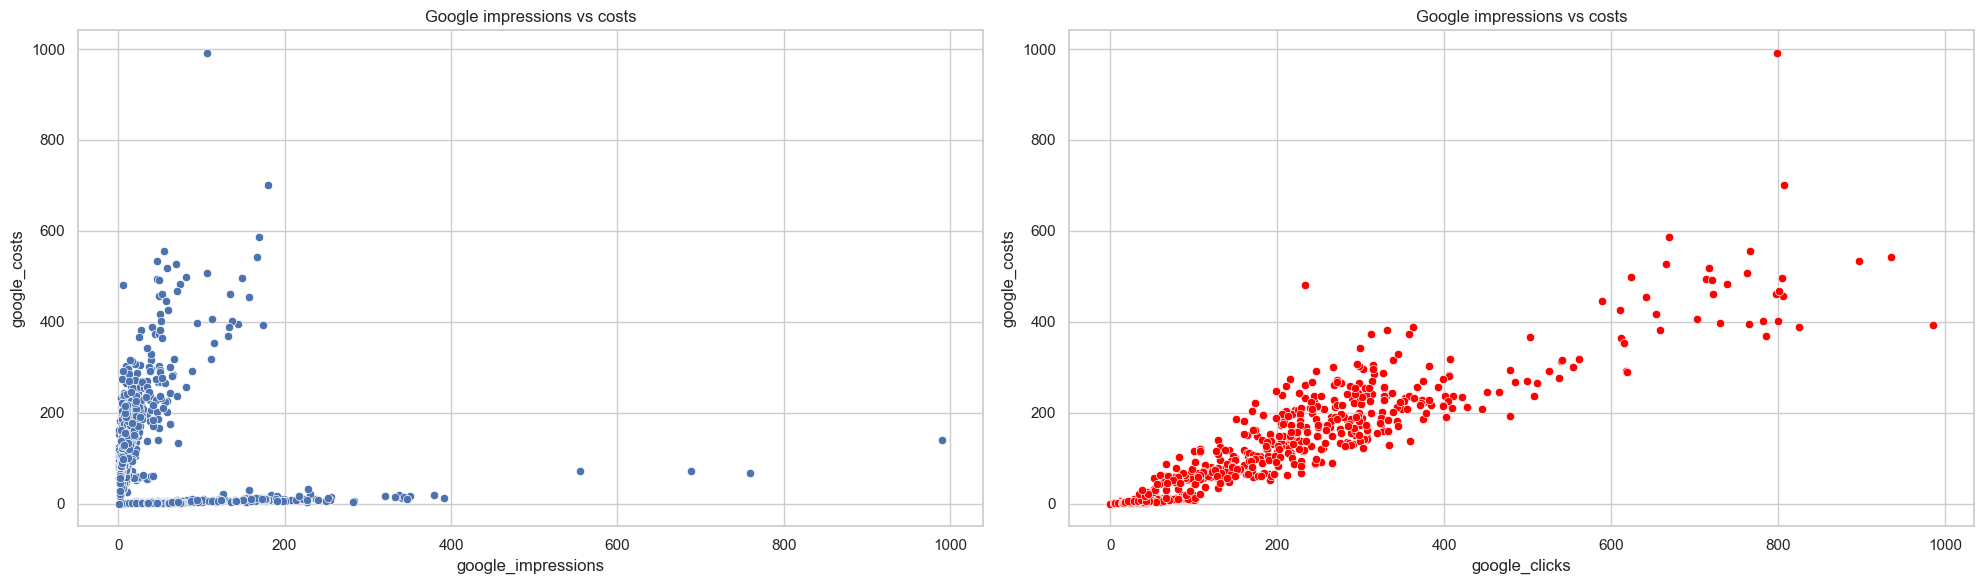

In [38]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x="google_impressions", y="google_costs")
plt.xlabel('google_impressions')
plt.ylabel('google_costs')
plt.title('Google impressions vs costs')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x="google_clicks", y="google_costs", color='red')
plt.xlabel('google_clicks')
plt.ylabel('google_costs')
plt.title('Google impressions vs costs')

plt.tight_layout()
plt.show()

- There appears to be an unclear correlation between impressions and costs for marketing on Google, with a noticeable divide between low costs and a high rate of impressions, as well as high costs and a lower rate of impressions.

- However, a clear and distinct correlation is evident between clicks and costs, highlighting the significant impact of cost on the rate of clicks.

# General Plots  

## Sales and Spend Data Over Time

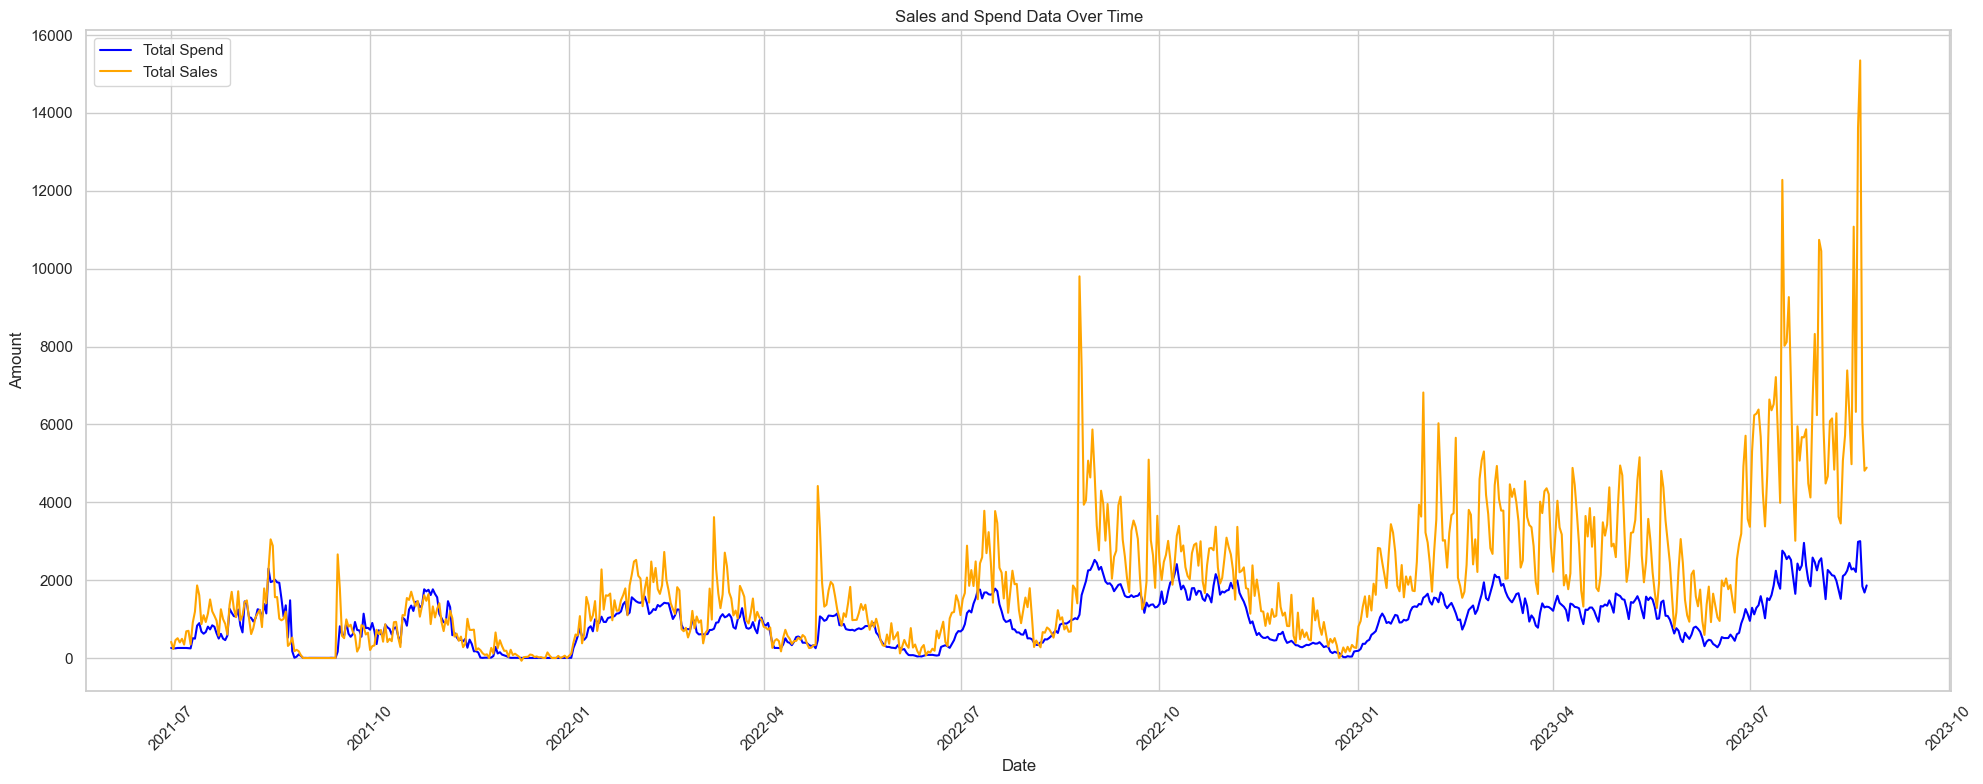

In [29]:
plt.figure(figsize=(20, 8)) 
sns.set(style="whitegrid")

plt.plot(df.index, df['Total_Spend'], linestyle='-', color='blue', label='Total Spend') 
plt.plot(df.index, df['total_sales'], linestyle='-', color='orange', label='Total Sales') 

plt.title('Sales and Spend Data Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')

plt.xticks(rotation=45)
plt.legend()  # Adding legend

plt.tight_layout()
plt.show()

 - Consistent marketing expenditure over time fuels gradual sales growth, with marketing costs consistently kept below sales figures.

- The ongoing commitment to marketing activities results in sustained sales growth, while effective cost management remains a constant.

- The fact that marketing expenses consistently remain below sales revenue highlights a positive and sustainable trend in the company's marketing success.

## Clicks vs. Total Sales and Impressions vs. Total Sales

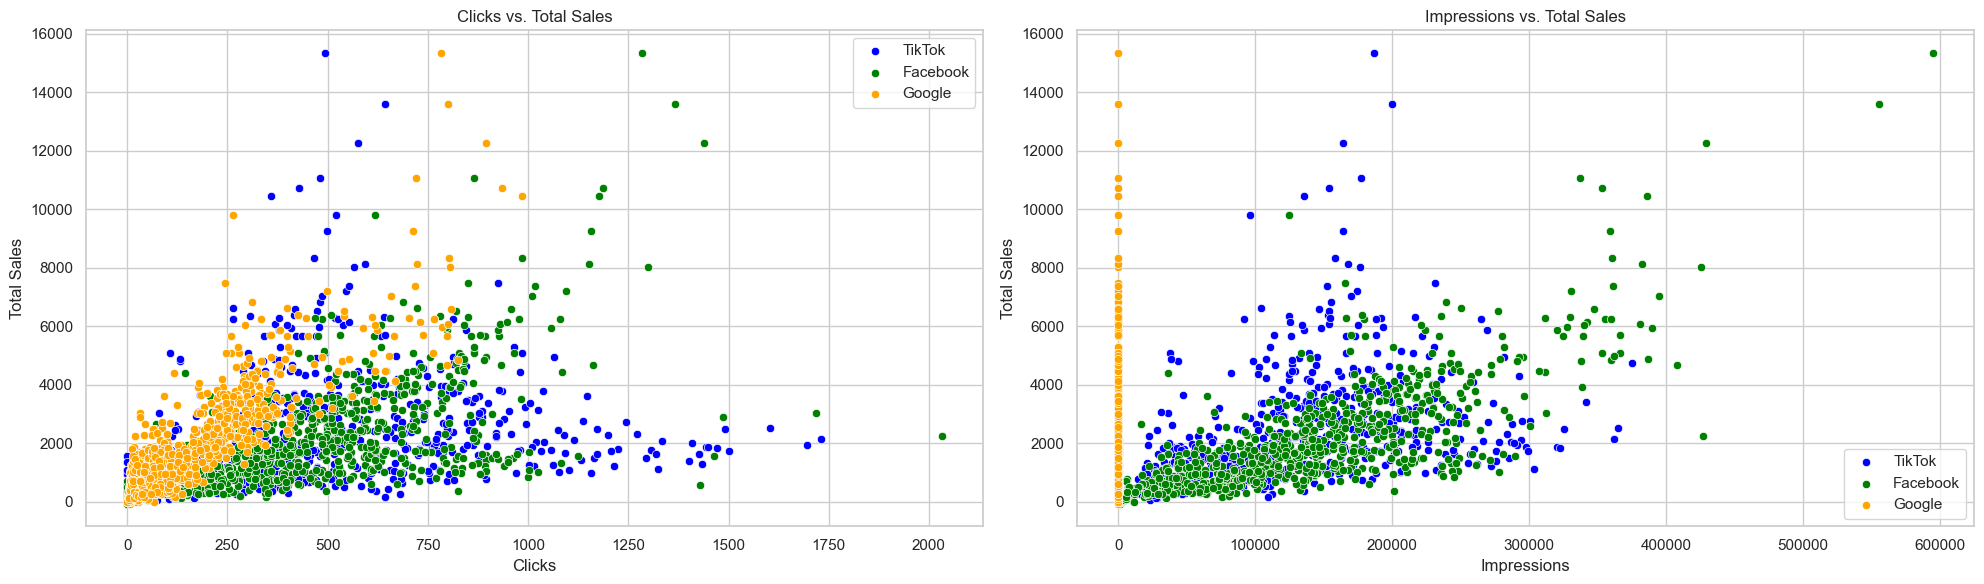

In [31]:
# Create the scatter plot using Seaborn
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
# Set the style for the plot (optional)
sns.set(style="whitegrid")
sns.scatterplot(x='tt_clicks', y='total_sales', data=df, label='TikTok', color='blue')
sns.scatterplot(x='fb_clicks', y='total_sales', data=df, label='Facebook', color='green')
sns.scatterplot(x='google_clicks', y='total_sales', data=df, label='Google', color='orange')
# Set plot title and labels
plt.title('Clicks vs. Total Sales')
plt.xlabel('Clicks')
plt.ylabel('Total Sales')
# Show legend
plt.legend()


plt.subplot(1,2,2)
# Set the style for the plot (optional)
sns.set(style="whitegrid")
sns.scatterplot(x='tt_impressions', y='total_sales', data=df, label='TikTok', color='blue')
sns.scatterplot(x='fb_impressions', y='total_sales', data=df, label='Facebook', color='green')
sns.scatterplot(x='google_impressions', y='total_sales', data=df, label='Google', color='orange')
# Set plot title and labels
plt.title('Impressions vs. Total Sales')
plt.xlabel('Impressions')
plt.ylabel('Total Sales')

# Show legend
plt.legend()

plt.tight_layout()
# Show the plot
plt.show()

- There is a clear and strong correlation between the number of clicks and the total sales across all platforms. This suggests that an increase in clicks tends to result in higher overall sales.

- Additionally, a robust correlation is observed between total sales and impressions on both Facebook and TikTok. This indicates that higher impressions on these platforms positively influence overall sales.

- In contrast, there is no clear correlation between Google's impressions and total sales. This observation aligns with the notion that Google might not be the ideal platform for generating high impression numbers.

- These insights underscore the importance of platform selection and click optimization in achieving marketing goals across different platforms.

## Average ROI by Weekday

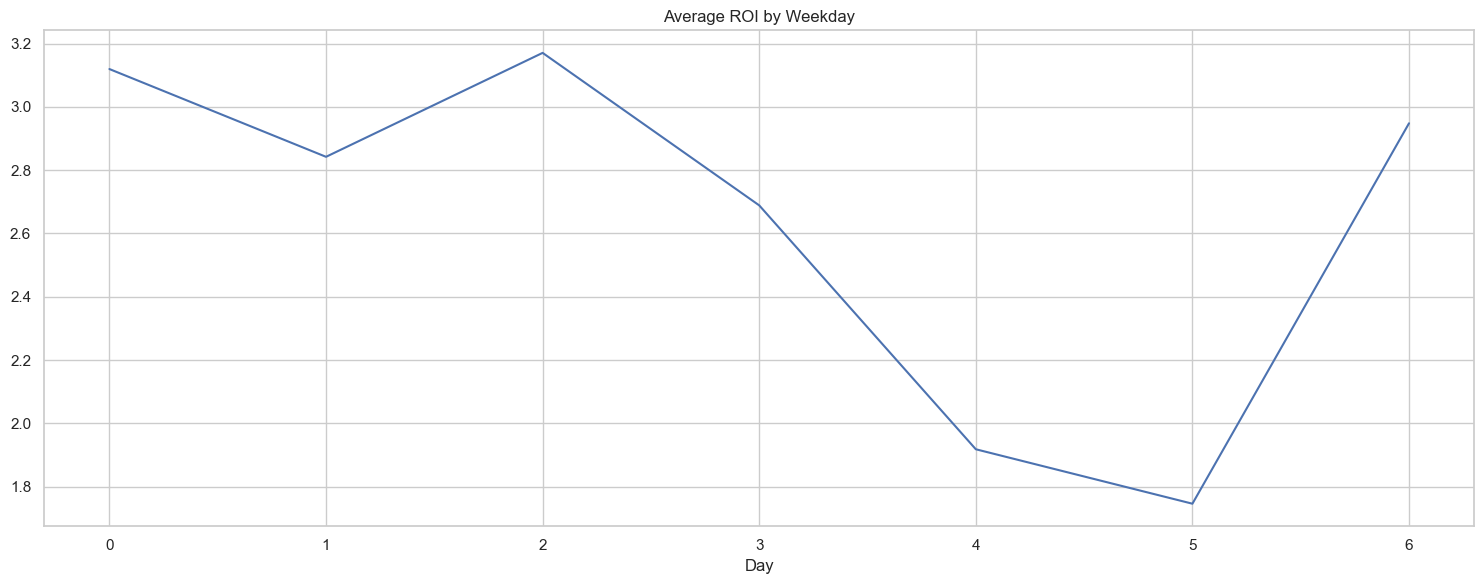

In [32]:
plt.figure(figsize=(15,6))

# Shows that on day 4 & 5 (fri, sat) of the week we have less ROI on average
df.groupby(df.index.dayofweek)["ROI"].mean().plot()
plt.title("Average ROI by Weekday")

plt.tight_layout()  # Improves subplot spacing
plt.show()

- The graphs clearly reveal that our average return on investment (ROI) is at its lowest on Fridays and Saturdays, suggesting these days witness the weakest sales performance throughout the week.

- To address this, we should delve into the underlying reasons behind this trend and consider tailored marketing strategies to potentially boost sales during these weekend days.

# Descriptive statistices

In [43]:
df.describe()

,orders,total_sales,fb_costs,fb_impressions,fb_clicks,google_costs,google_impressions,google_clicks,tt_costs,tt_impressions,tt_clicks,Total_Spend,ROI,fb_cpc,tt_cpc,google_cpc,fb_cpm,tt_cpm,google_cpm
count,785.000000,785.000000,763.000000,763.000000,763.000000,784.000000,784.000000,784.000000,601.000000,601.000000,601.000000,785.000000,785.000000,763.000000,576.000000,781.000000,763.000000,576.000000,784.000000
mean,50.798726,1968.020497,688.617720,133647.986894,444.597641,106.072372,48.367347,170.690051,263.777022,126402.222962,505.029950,977.205159,2.633460,inf,inf,0.457358,5.387611,2.221111,9962.161941
std,42.165100,1870.672852,447.556917,93026.566531,297.258509,123.153201,81.373963,174.082017,153.930623,76706.279910,331.108475,642.223276,4.518405,NaN,NaN,0.316787,2.404996,0.643939,17168.837754
min,0.000000,-69.990000,1.930000,123.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.810000,-26.713740,0.093019,0.133133,0.010000,0.848693,0.738645,0.000000
25%,22.000000,695.960000,316.500000,59696.500000,212.000000,3.875000,9.000000,33.000000,150.000000,59886.000000,284.000000,468.330000,1.241135,1.326815,0.432373,0.134000,4.312546,1.861960,51.501014
50%,42.000000,1493.690000,655.800000,125746.000000,424.000000,62.930000,20.000000,122.000000,268.810000,126648.000000,454.000000,931.220000,1.782387,1.600250,0.551105,0.498009,5.111738,2.149530,6187.500000
75%,71.000000,2723.950000,987.070000,190183.500000,620.000000,172.847500,49.250000,249.750000,358.330000,177245.000000,699.000000,1429.530000,2.616446,2.011759,0.692062,0.675692,6.172846,2.461124,12271.428571
max,356.000000,15348.420000,2294.690000,595105.000000,2033.000000,991.360000,990.000000,985.000000,840.370000,374925.000000,1731.000000,3001.730000,55.344648,inf,inf,2.062918,48.084112,7.303170,161390.000000
